# Assignment 1

Machine Learning (BBWL), Michael Mommert, FS2023, University of St. Gallen

The **goal** of this assignment is to implement a $k$-Nearest Neighbor (kNN) classifier that performs classification on the accompanied dataset. The dataset is 5-dimensional and consists of numerical features, only. Each datapoint belongs to either of three classes. Train a kNN classifier in such a way as to maximize its performance and to generalize well.

The general **objectives** are:
* to implement the ML pipeline using *scikit-learn* as discussed in the lecture and the lab course, following best practices;
* to properly perform hyperparameter tuning from which clearly follows which value of $k$ has been chosen and why;
* to compare the performance of the best trained model on the training, validation and test datasets, preventing both overfitting and underfitting.

This assignment will be **graded** based on:
* whether these objectives have been achieved;
* whether the solution follows best practices;
* how well the approach is documented (e.g., using text cells, plots, etc.);
* how clean the code is;
* the performance of the trained model.

There are no restrictions on the resources that you can use -- collaborating on assignments is allowed -- but students are not allowed to submit identical code.

Please submit your runnable Notebook to [michael.mommert@unisg.ch](mailto:michael.mommert@unisg.ch) **before 26 March 2023, 23:59**. Please include your name in the Notebook filename.

-----

The following code cell will import the dataset used in this assignment. Please do not modify this code cell.

In [ ]:
import numpy as np
from urllib.request import urlopen
from io import BytesIO

# load data as binary npy file
raw_data = np.load(BytesIO(urlopen("https://raw.githubusercontent.com/HSG-AIML-Teaching/MLBBWL-2023FS/main/assignment_1/data.npy").read()))

x = raw_data[:,:5]  # this is your input data
y = raw_data[:, 5]  # this is your target vector

x.shape, y.shape

((2000, 5), (2000,))

Please add your code in the following ... Good Luck!

In [ ]:
# 80% accuracy should be possible
# import sklearn data pre-processing libraries
from sklearn.model_selection import train_test_split

# import matplotlib data visualization library
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

from sklearn.neighbors import KNeighborsClassifier


#1 Dataset Exploration

In [ ]:
# looking at the first 5 rows of data

x[:5,]


array([[-2.10919794e+00, -1.44388052e+00, -1.00620248e-01,
        -9.09167616e+01, -8.93274614e-01],
       [-4.46935907e+00, -2.37586643e-01, -1.16520037e-01,
         3.98359784e+00,  1.21664908e-01],
       [ 5.75408404e+00, -4.59972576e-01,  7.93010874e-02,
        -8.79507298e+01, -6.28721125e-02],
       [-2.31423973e+00,  1.16254971e+00, -1.57523315e-02,
         9.19941316e+01,  9.73046809e-01],
       [ 5.21116024e+00, -4.31351487e-01,  6.39588486e-02,
        -8.55528376e+01,  3.84139417e-02]])

In [ ]:
# looking at the unique values of target

np.unique(y)

# Based on the output we have three different classes to cluster

array([0., 1., 2.])

<Figure size 720x720 with 0 Axes>

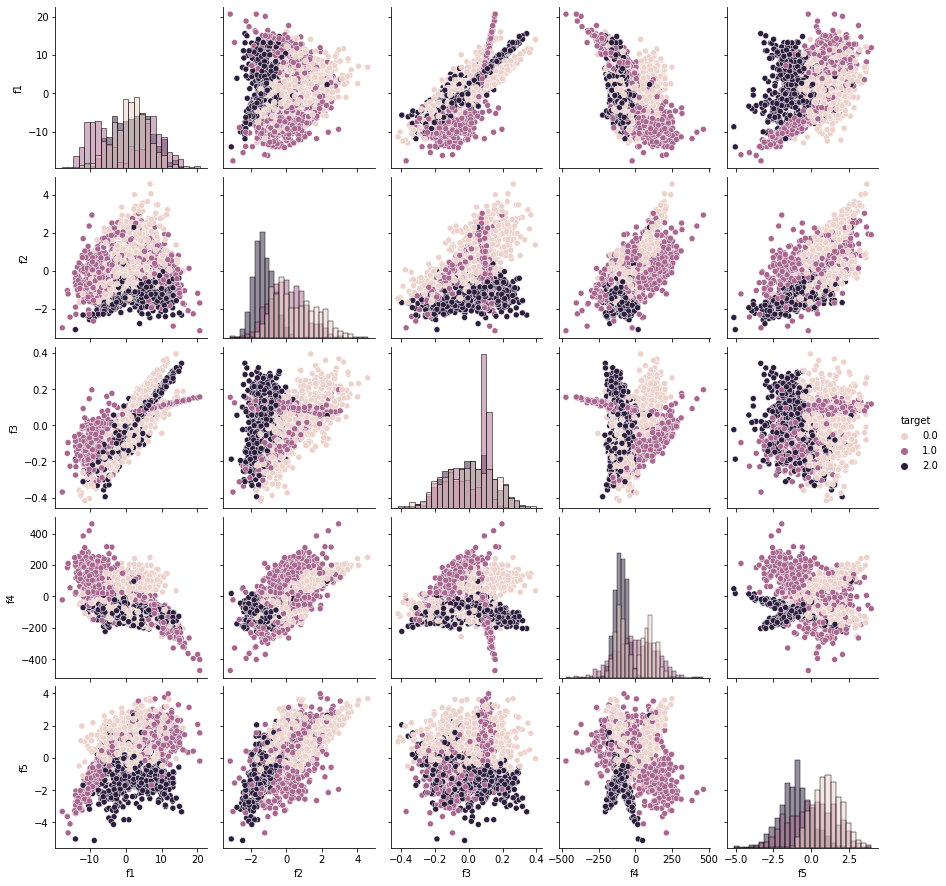

In [ ]:
# Create a Pairplot to see how the data is roughly distributed
# and get a better idea of what we are woking with

# init the plot
plt.figure(figsize=(10, 10))

# convert np.array into pandad DataFrame for sns to read
df = pd.DataFrame(raw_data, columns = ['f1','f2','f3','f4', 'f5', 'target'])

# plot a pairplot of the distinct feature distributions
sns.pairplot(df, diag_kind='hist', hue = 'target');

What do we see from this Pairplot?



1.   There is no obvious decision boundry as in the IRIS dataset
2.   Some classes have a high density for a particular value for class 1 that is f3 with the value = 0.1, calss 2 that is f4 vor the value = -200/-150
3. will the N be sufficient for the number of dimmensions?



# 1 Data Scaling

In [ ]:
# First we try robust scaler
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

# Transofrmation of x and now raw_data because we want to keep the classes in takt and not obscure the transformation
data_scaled = scaler.fit_transform(x)

print('original data, mean =', np.mean(x, axis=0))
print('original data, std =', np.std(x, axis=0))
print('scaled data, mean =', np.mean(data_scaled, axis=0))
print('scaled data, std =', np.std(data_scaled, axis=0))

original data, mean = [ 1.09601194e+00 -2.29968843e-01  1.76978407e-04 -3.33289369e+01
  3.11462920e-02]
original data, std = [  6.65215327   1.25516616   0.1366331  114.74986909   1.46971517]
scaled data, mean = [-0.04803899  0.11103905 -0.064503    0.1850469  -0.01039336]
scaled data, std = [0.67375908 0.70085853 0.6609607  0.66975283 0.67494136]


In [ ]:
data_scaled[0]

array([-0.37267662, -0.56678385, -0.55210815, -0.15107208, -0.43491773])

In [ ]:
arr = np.array([[0,2,4],[6,8,10]]) 
app_arr=np.append(arr, [[5,7,9],[13,15,17]],axis = 1) 
app_arr

array([[ 0,  2,  4,  5,  7,  9],
       [ 6,  8, 10, 13, 15, 17]])

<Figure size 720x720 with 0 Axes>

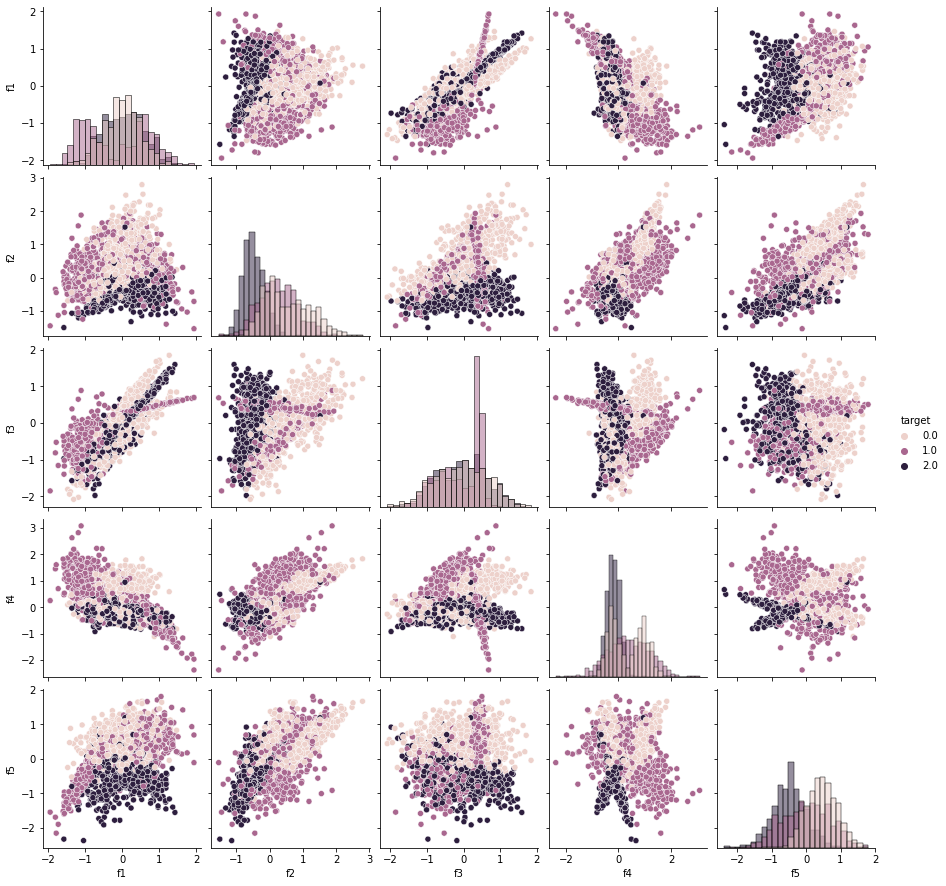

In [ ]:
#visualization of scaled data out of curiosity
# init the plot
plt.figure(figsize=(10, 10))

# stack the original y and the transformed x into one np array =  raw_data_scaled along the vertical axis

raw_data_scaled = np.concatenate((data_scaled, np.expand_dims(y, axis = 1)), axis = 1)

# convert np.array into pandad DataFrame for sns to read
df_scaled = pd.DataFrame(raw_data_scaled, columns = ['f1','f2','f3','f4', 'f5', 'target'])

# plot a pairplot of the distinct feature distributions
sns.pairplot(df_scaled, diag_kind='hist', hue = 'target');


#3 Data spliting

In [ ]:
train_fraction = 0.6
random_seed = 42

In [ ]:
# 60% training and 40% remainder
x_train, x_remainder, y_train, y_remainder = train_test_split(data_scaled, y, test_size=1-train_fraction, 
                                                              random_state=random_seed, stratify=y)

# For something reliable you need to do all three splitts, in this case we have to splitt in two steps

# stratify = make things unsorted, based on iris.target but with same fraction of all three classes

In [ ]:
# 50% validation and 50% test
x_val, x_test, y_val, y_test = train_test_split(x_remainder, y_remainder, test_size=0.5, 
                                                random_state=random_seed, stratify=y_remainder)

In [ ]:
print('original:', data_scaled.shape, y.shape)
print('train:', x_train.shape, y_train.shape)
print('val:', x_val.shape, y_val.shape)
print('test:', x_test.shape, y_test.shape)

original: (2000, 5) (2000,)
train: (1200, 5) (1200,)
val: (400, 5) (400,)
test: (400, 5) (400,)


# 4 Define Hyperparameters

In [ ]:
k = 1

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
for k in range(1,30, 2):
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_val)
  print('k={:d}, val accuracy={:.2f}%'.format(k, accuracy_score(y_pred, y_val)*100))

k=1, val accuracy=82.25%
k=3, val accuracy=83.50%
k=5, val accuracy=84.75%
k=7, val accuracy=85.25%
k=9, val accuracy=85.25%
k=11, val accuracy=83.50%
k=13, val accuracy=83.50%
k=15, val accuracy=84.25%
k=17, val accuracy=84.00%
k=19, val accuracy=84.75%
k=21, val accuracy=84.25%
k=23, val accuracy=83.75%
k=25, val accuracy=84.25%
k=27, val accuracy=84.25%
k=29, val accuracy=84.25%
